1. Let $f(x)=x+2/x$.

    (1) Use quadratic Lagrange interpolation based on the nodes $x_{0}=1$, $x_{1}=2$, and $x_{2}=2.5$ to approximate $f(1.5)$ and $f(1.2)$. 

    (2) Use cubic Lagrange interpolation based on the nodes $x_{0}=0.5$, $x_{1}=1$, $x_{2}=2$, and $x_{3}=2.5$ to approximate $f(1.5)$ and $f(1.2)$.

    (3) Compare the results of (1) and (2), and discuss on it.

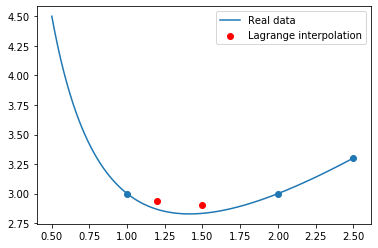

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    x = np.array(x)
    return x + 2 / x

def Lagrange(x, x0, y0, N=None):
    if N == None:           # get shape of data
        N = np.array(x).shape[0]
    if x in x0:             # special case
        return y0[x0.index(x)]
    ans = 0                 # regular case
    for i in range(N):
        L = y0[i]               # Lagrange index     
        for k in range(N):
            if i == k:
                continue
            L *= (x - x0[k]) / (x0[i] - x0[k])
        ans += L
    return ans

# 1) ==========================================================
x0 = [1, 2, 2.5]
y0_real = f1(x0)
y_lag = np.zeros(2)
y_lag[0] = Lagrange(1.5, x0, y0_real, 3)
y_lag[1] = Lagrange(1.2, x0, y0_real, 3)

x_plot = np.linspace(0.5, 2.5, 100)
plt.figure()
plt.plot(x_plot, f1(x_plot), label="Real data")
plt.scatter(x0, y0_real)
plt.scatter([1.5, 1.2], y_lag, c='r', label="Lagrange interpolation")
plt.legend()
plt.show()
plt.close()

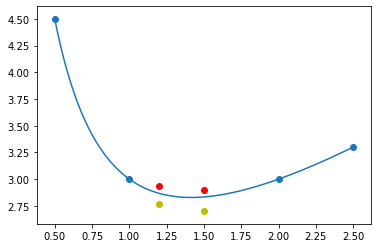

In [13]:
# 2) ======================================================
x0 = [0.5, 1, 2, 2.5]
y0_real = f1(x0)
y2_lag = np.zeros(2)
y2_lag[0] = Lagrange(1.5, x0, y0_real, 4)
y2_lag[1] = Lagrange(1.2, x0, y0_real, 4)

x_plot = np.linspace(0.5, 2.5, 100)
plt.figure()
plt.plot(x_plot, f1(x_plot), label="Real data")
plt.scatter(x0, y0_real)
plt.scatter([1.5, 1.2], y_lag, c='r', label="quadratic interpolation")
plt.scatter([1.5, 1.2], y2_lag, c='y', label="cubic interpolation")
plt.show()
plt.close()

I found that both quadratic and cubic Lagrange interpolation don't perform well on this $x+2/x$ function. And raising the order of interpolation didn't improve its performance. The step size is too large.

2. Consider the function $f(x)=\sin x$ on the interval $[0,1]$. Determine the step size $h$ so that

    (1) linear Lagrange interpolation has an accuracy of $10^{-6}$ (i.e. find $h$ such that $\left\vert \Delta f_{1}\left(  x\right)  \right\vert
    <5\times10^{-7}$).

    (2) quadratic Lagrange interpolation has an accuracy of $10^{-6}$ (i.e. find $h$ such that $\left\vert \Delta f_{2}\left(  x\right)  \right\vert
    <5\times10^{-7}$).

    (3) cubic Lagrange interpolation has an accuracy of $10^{-6}$ (i.e. find $h$ such that $\left\vert \Delta f_{3}\left(  x\right)  \right\vert <5\times
    10^{-7}$).


**solution:**  
(1) for linear Lagrange interpolation,
$$\Delta f(x) \le \frac{\gamma_1}{8}(x_{i+1}-x_{i})^2=\frac{\gamma_1h^2}{8}$$
in which $\gamma_1 =\max|f''(x)|$. As for $f(x)=\sin(x)$,$\gamma_1=1$
So$$\frac{h^2}{8}<5\times 10^{-7}$$
Get$$h\lt 2\times10^{-3}$$

(2) For $n \ge 2$,
$$|\Delta f(x)|\le \frac{\gamma}{4(n+1)}h^{n+1},$$
in which $\gamma = \max{|f^{(n+1)}(x)|}$, and for $f(x)=\sin(x)$,$\gamma = 1$
now $n=2$,$$\frac{h^3}{12}<5\times 10^{-7}$$
Get $$h<1.817\times 10^{-2}$$

(3) For $n=3$,$$\frac{h^4}{16}\lt5\times 10^{-7}$$
get $$h<0.0532$$

3. Given the data in the following table, construct a divided differences table and interpolate at $x = 2.4$ and $x = 4.2$ using the fourth-degree Newton interpolating polynomial $p_4(x)$.

| $x_k$ | 1    | 2    | 3    | 4    | 6    |
| --- | --- | --- | --- | --- | --- |  
| $f_k$ | 0.69 | 1.10 | 1.39 | 1.61 | 1.95 |

In [6]:
import numpy as np
x = np.array([1,2,3,4,6])
f = np.array([0.69,1.10,1.39,1.61,1.95])

divided differences table:
$$
\begin{matrix}
f_0\\
f_1 & [x_0x_1]\\
\vdots & & \ddots\\
f_{n-1} & [x_{n-2}x_{n-1}] & [x_{n-3}x_{n-2}x_{n-1}]\\
f_n & [x_{n-1}x_{n}] & [x_{n-2}x_{n-1}x_{n}] & \dots & [x_0x_1\dots x_n]
\end{matrix}
$$

In [18]:
class Diff_devided:
    def __init__(self,x,y):
        self.size = len(x)-1
        self.dd = []
        self.dd.append((y[0:-1]-y[1:])/(x[0:-1]-x[1:]))      #计算 [x_i x_{i-1}]
        for i in range(1,self.size):                         #递归计算各高阶的
            temp = np.zeros(self.size - i)
            temp = ( self.dd[i-1][0:-1] - self.dd[i-1][1:] ) / (x[0:-(i+1)] - x[i+1:])
            self.dd.append(temp)
    
    def show(self):
        for i in range(self.size):
            print(f'{i+1} 阶：{self.dd[i]}')
        
a = Diff_devided(x,f)
a.show()

1 阶：[0.41 0.29 0.22 0.17]
2 阶：[-0.06       -0.035      -0.01666667]
3 阶：[0.00833333 0.00458333]
4 阶：[-0.00075]


写成表格形式：
$$
\begin{matrix}
f_0\\
f_1 & 0.41\\
f_2 & 0.29 & -0.06\\
f_3 & 0.22 & -0.035 & 0.00833\\
f_4 & 0.17 & -0.01667 & 0.004583 & -0.00075
\end{matrix}
$$

4. Consider the data for $x = 0:20$ generated by the Bessel function of the first kind of order zero $J_0(x)$. Construct and plot the cubic splines, interpolate at $x = 3.4$, and compare with the actual value at that point.
   Hint: `scipy.special.jv` defines Bessel function of the first kind of real order and complex argument.  `scipy.special.spherical_jn` defines spherical Bessel function of the first kind or its derivative.

The reference error is 0.0042


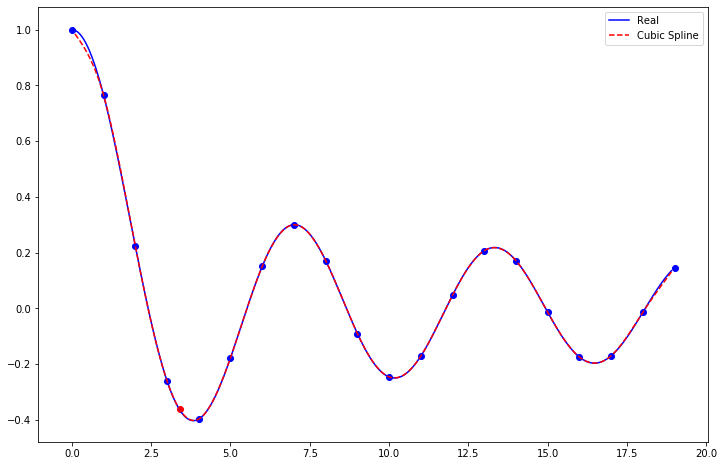

In [41]:
import scipy

def CubicSpline(x, y, dim=None):
    if dim == None:
        dim = np.array(x).shape[0]
    n = dim - 1
    eq_M = np.zeros((n*4, n*4)) # [equation_num, para_num]
    eq_b = np.zeros((n*4))

    # equation for fit and continuous from 0 to 2*n-1
    for i in range(0, n): 
        # for each start point (S_i(x_i) = f_i)
        eq_M[i, 4 * i] = (x[i] - x[i])**3       # a_i  
        eq_M[i, 4 * i + 1] = (x[i] - x[i])**2   # b_i  
        eq_M[i, 4 * i + 2] = (x[i] - x[i])      # c_i  
        eq_M[i, 4 * i + 3] = 1                      # d_i  
        eq_b[i] = y[i]
        # for each end point (S_i(x_i+1) = f_i+1)
        eq_M[n + i, 4 * i] = (x[i+1] - x[i])**3       # a_i  
        eq_M[n + i, 4 * i + 1] = (x[i+1] - x[i])**2   # b_i  
        eq_M[n + i, 4 * i + 2] = (x[i+1] - x[i])      # c_i  
        eq_M[n + i, 4 * i + 3] = 1                        # d_i  
        eq_b[n + i] = y[i+1]

    # first order dev: from 2n to 3n-2
    for i in range(0, n-1):
        eq_M[2*n+i, 4 * i] = 3 * (x[i+1] - x[i])**2       # a_i  
        eq_M[2*n+i, 4 * i + 1] = 2 * (x[i+1] - x[i])      # b_i  
        eq_M[2*n+i, 4 * i + 2] = 1                          # c_i  
        eq_M[2*n+i, 4 * i + 3] = 0                          # d_i  
        eq_M[2*n+i, 4 * i + 4] = -3 * (x[i+1] - x[i+1])**2  # a_i  
        eq_M[2*n+i, 4 * i + 5] = -2 * (x[i+1] - x[i+1])     # b_i  
        eq_M[2*n+i, 4 * i + 6] = -1                         # c_i  
        eq_M[2*n+i, 4 * i + 7] = 0                          # d_i  
        eq_b[2*n+i] = 0
    
    # second order dev: from 3n-1 to 4n-3
    for i in range(0, n-1):
        eq_M[3*n-1+i, 4*i] = 6 * (x[i+1] - x[i])      # a_i  
        eq_M[3*n-1+i, 4*i+1] = 2                        # b_i  
        eq_M[3*n-1+i, 4*i+2] = 0                        # c_i  
        eq_M[3*n-1+i, 4*i+3] = 0                        # d_i  
        eq_M[3*n-1+i, 4*i+4] = -6 * (x[i+1] - x[i+1])   # a_i  
        eq_M[3*n-1+i, 4*i+5] = -2                       # b_i  
        eq_M[3*n-1+i, 4*i+6] = 0                        # c_i  
        eq_M[3*n-1+i, 4*i+7] = 0                        # d_i  
        eq_b[3*n-1+i] = 0

    # natural BVC
    eq_M[4*n-2, 0] = 6 * (x[0] - x[0])    # a_i  
    eq_M[4*n-2, 1] = 2                        # b_i  
    eq_M[4*n-2, 2] = 0                        # c_i  
    eq_M[4*n-2, 3] = 0                        # d_i    
    eq_b[4*n-2] = 0

    eq_M[4*n-1, 4*(n-1)+0] = 6 * (x[n] - x[n-1])    # a_i  
    eq_M[4*n-1, 4*(n-1)+1] = 2                        # b_i  
    eq_M[4*n-1, 4*(n-1)+2] = 0                        # c_i  
    eq_M[4*n-1, 4*(n-1)+3] = 0                        # d_i    
    eq_b[4*n-1] = 0

    parameters = scipy.linalg.solve(eq_M, eq_b)

    return parameters 

def CubicSplineResult(x, parameters, x0, dim=None):
    if dim == None:
        dim = np.array(x0).shape[0]
    
    find_interval = False
    for i in range(dim):
        if x <= x0[i]:
            find_interval = True
            break
    if i == 0 or (not find_interval):
        print("x is not in the interval!")
        return None

    return parameters[4*(i-1)] * (x - x0[i-1])**3 +\
        parameters[4*(i-1) + 1] * (x - x0[i-1])**2 +\
        parameters[4*(i-1) + 2] * (x - x0[i-1]) +\
        parameters[4*(i-1) + 3]



x = range(0, 20)
y = scipy.special.jn(0, x)
dim = 20
x_target = 3.4

para = CubicSpline(x, y)
y_target = CubicSplineResult(x_target, para, x)

ref_error = np.abs((y_target - scipy.special.jn(0, x_target)) / scipy.special.jn(0, x_target))
print(f"The reference error is {ref_error:0.4f}")

# for plot:
x_cubi = np.linspace(0.1, 18.9, 1000)
y_cubi = []
for x_cubi_element in x_cubi:
    y_cubi.append(CubicSplineResult(x_cubi_element, para, x))
y_real = scipy.special.jn(0, x_cubi)


plt.figure(figsize=(12, 8))
plt.plot(x_cubi, y_real, c='b', label='Real')
plt.scatter(x, y, c='b')
plt.plot(x_cubi, y_cubi, c='r', linestyle='--', label='Cubic Spline')
plt.scatter(x_target, y_target, c='r')
plt.legend()
plt.show()
plt.close()

Cubic spline method is accurate that the reference error comes to 0.0042. Also, natural boundary condition can only influence the start point and end point of interpolation.

5. The following table gives the value of the integral
    $$
    I(\alpha)=\int_{0}^{\pi/2}\frac{d\phi}{\sqrt{1-\sin^{2}\alpha\sin^{2}\phi}}
    $$
    for various values of $\alpha$. (This integral is the complete elliptical integral of the first kind.)



| $\alpha$ ($^0$) | 0       | 5       | 10      | 15      | 20      | 25   | 
| --------------- | ------- | ------- | ------- | ------- | ------- | ------- |    
| $I$    | 1.57080 | 1.57379 | 1.58284 | 1.59814 | 1.62003 | 1.64900 |

    (1) Using polynomial interpolation, find $I$ when $\alpha= 2^0$.

    (2) Use the trial-and-error search to find the value of $\alpha$ such that $I=1.58$.

6. The cross section measured for the resonant scattering of a neutron from a nucleus:

| $k$  | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $E_k$  (MeV) | 0    | 25   | 50   | 75   | 100  | 125  | 150  | 175  | 200  |
| $f(E_k)$  (mb)  | 10.6 | 16.0 | 45.0 | 83.5 | 52.8 | 19.9 | 10.8 | 8.25 | 4.70 |
| $\pm \sigma_k$ (mb)  | 9.34 | 17.9 | 41.5 | 85.5 | 51.5 | 21.5 | 10.8 | 6.29 | 4.14 |

   (1) The Breit-Wigner formula is given as
    $$
     f(E)=\frac{f_r}{(E-E_r)^2+\Gamma^2/4} 
    $$
    Try to fit the entire data with the Breit-Wigner formula. What is your interpretation of the parameters $f_r$, $E_r$ and $\Gamma$? Use your result to predict the cross section $f(E)$ when the neutron energy $E=10, 90, 185$MeV. 
   (2) Apply the cubic spline interpolation to predict the cross section $f(E)$ when the neutron energy $E=10, 90, 185$MeV. What kind of boundary condition you can choose for the computation? Compare the results of (1) and (2), and discuss on it.


7. The data in the following table shows the population of Canada recorded every 10 years between 1960 and 2010.
    (1) Find the rate of population growth in 2010 using the three-point backward difference formula,
    (2) Using the result of (1), and applying the two-point central difference formula, predict the population in Year 2020.

   | Year | Population (millions) |
    | ---- | --------------------- |
    | 1960 | 17.9                  |
    | 1970 | 21.3                  |
    | 1980 | 24.6                  |
    | 1990 | 27.8                  |
    | 2000 | 30.8                  |
    | 2010 | 34.1                  |

8. The partial derivative $f_x(x,y)$ of $f(x,y)$ with respect to $x$ is obtained by holding $y$ fixed and differentiating with respect to $x$. Similarly, $f_y(x,y)$ is found by holding $x$ fixed and differentiating with respect to $y$. The central-difference formula can be adapted to partial derivatives
    $$
    \begin{aligned}
    f_x(x,y)&=\frac{f(x+h,y)-f(x-h,y)}{2h}+O(h^2)\\
    f_y(x,y)&=\frac{f(x,y+h)-f(x,y-h)}{2h}+O(h^2)\end{aligned} 
    $$
    Let $f(x,y)=xy/(x+y)$. Calculate approximations to $f_x(2,3)$ and $f_y(2,3)$ with $h=0.1, 0.01$, and $0.001$. Compare with the values obtained by differentiating $f(x,y)$ partially.